# Data Augmentation Lab

Welcome to the data augmentation lab! By the end of this lab you will have

- Used data augmentation to increase the effective size a training set resulting in increased performance on MNIST

Let's get started!

# Load MNIST

The following code loads MNIST images into memory and normalizes them.

In [1]:
from IPython.display import display
from keras.datasets import mnist

[X_mnist, y_mnist], [X_test, y_test] = mnist.load_data()
X_mnist, X_test = X_mnist/255., X_test/255.
    
X_mnist.shape

Using TensorFlow backend.


(60000, 28, 28)

# Create Training Set

The following code creates a training set consisting of one image digit per class.

In [2]:
from IPython.display import display
from keras.preprocessing.image import array_to_img
import numpy as np

digit_idxs = [np.argwhere(y_mnist == d).flatten()[0] for d in range(10)]
X_train = X_mnist[digit_idxs]

for x in X_train:
    img = array_to_img(np.expand_dims(x, axis=0), data_format='channels_first')
    display(img)

X_train.shape

(10, 28, 28)

In [4]:
X_train[0]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.    

## Define the CNN Architecture

The following code defines and compiles a CNN architecture. You are **not** to modify it!

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[28, 28, 1]))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

## Prepare Data for TensorFlow

The following code converts the training and test images into TensorFlow dimension ordering. Additionally we only take the first 1000 test images to form our test set.

In [6]:
from keras.utils.np_utils import to_categorical

nb_test = 1000

X_tf_train = np.expand_dims(X_train, axis=-1)
X_tf_test = np.expand_dims(X_test, axis=-1)[:nb_test]

y_train, y_test = np.arange(10), y_test[:nb_test]
Y_train, Y_test = to_categorical(y_train), to_categorical(y_test)

X_tf_train.shape, X_tf_test.shape

((10, 28, 28, 1), (1000, 28, 28, 1))

# Fit the Model

The following code fits the model defined above on the training set and validates over the test set. A callback is used which displays training information after every epoch.

{'val_loss': [1.8353188972473145, 1.7339285545349121, 1.7222231311798095, 1.7329029808044434, 1.7320853557586671, 1.7606273393630982, 1.7164811086654663, 1.7627389545440675, 1.8322706031799316, 1.8601572761535645, 1.8944817085266112, 2.0137750949859621, 1.8464826107025147, 1.9351490554809569, 1.9152326965332032, 1.8523096313476564, 1.9123710536956786, 1.8909367427825927, 1.8263198966979981, 1.8174826011657714, 1.8260289039611817, 1.8088568515777588, 1.8907924346923828, 1.8484832763671875, 1.8811339015960693], 'val_acc': [0.44500000000000001, 0.45600000000000002, 0.45200000000000001, 0.46000000000000002, 0.46100000000000002, 0.45800000000000002, 0.46700000000000003, 0.45500000000000002, 0.44600000000000001, 0.44400000000000001, 0.44900000000000001, 0.41899999999999998, 0.45000000000000001, 0.435, 0.44400000000000001, 0.45900000000000002, 0.44, 0.44500000000000001, 0.46700000000000003, 0.46500000000000002, 0.46500000000000002, 0.46500000000000002, 0.45400000000000001, 0.46300000000000002

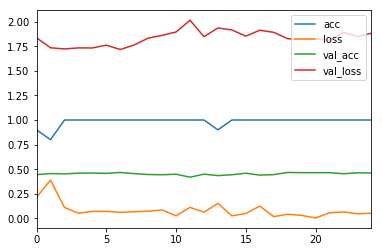

10/10 [==============================] - 1s - loss: 0.0523 - acc: 1.0000 - val_loss: 1.8811 - val_acc: 0.4620


In [8]:
import IPython
import keras
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

class TrainingVisualizerCallback(keras.callbacks.History):
    def on_epoch_end(self, epoch, logs={}):
        super().on_epoch_end(epoch, logs)
        IPython.display.clear_output(wait=True)
        pd.DataFrame(self.history).plot()
        #print(self.history)
        plt.show()

model.fit(X_tf_train, Y_train, epochs=25, validation_data=(X_tf_test, Y_test), callbacks=[TrainingVisualizerCallback()])

## Task

- Play around with `keras.preprocessing.image.ImageDataGenerator` to generate some images which look like realistic MNIST images

## Hints

- Learn what types of augmentations are available by reading the [`keras.preprocessing.image.ImageDataGenerator`](https://keras.io/preprocessing/image/) documentation

In [62]:
from IPython.display import display
import keras

datagen_rotation = keras.preprocessing.image.ImageDataGenerator(rotation_range=60)
data_gen_horizontal_flip = keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True)
datagen_vertical_flip = keras.preprocessing.image.ImageDataGenerator(vertical_flip=True)
datagen_shear  = keras.preprocessing.image.ImageDataGenerator(shear_range=60)
datagen_center = keras.preprocessing.image.ImageDataGenerator(samplewise_center=True)
datagen_height_shift = keras.preprocessing.image.ImageDataGenerator(height_shift_range=.5)

In [52]:
datagen_rotation.fit(X_tf_train)
image = datagen_rotation.flow(X_tf_train, Y_train, batch_size=32)
for _ in range(10):
    X, y = next(image)
    img = array_to_img(X[0])
    display(img)

In [53]:
data_gen_horizontal_flip.fit(X_tf_train)
image_2 = data_gen_horizontal_flip.flow(X_tf_train, Y_train, batch_size=32)
for _ in range(10):
    X, y = next(image_2)
    img = array_to_img(X[0])
    display(img)

In [54]:
datagen_vertical_flip .fit(X_tf_train)
image_3 = data_gen_horizontal_flip.flow(X_tf_train, Y_train, batch_size=32)
for _ in range(10):
    X, y = next(image_3)
    img = array_to_img(X[0])
    display(img)

In [69]:
datagen_shear.fit(X_tf_train)
image_4 = datagen_shear.flow(X_tf_train, Y_train, batch_size=32)
for _ in range(10):
    X, y = next(image_4)
    img = array_to_img(X[0])
    display(img)

In [70]:


datagen_center.fit(X_tf_train)
image_5 = datagen_center.flow(X_tf_train, Y_train, batch_size=32)
for _ in range(10):
    X, y = next(image_5)
    img = array_to_img(X[0])
    display(img)

In [73]:

datagen_height_shift.fit(X_tf_train)
image_6 = datagen_height_shift.flow(X_tf_train, Y_train, batch_size=32)
for _ in range(10):
    X, y = next(image_6)
    img = array_to_img(X[0])
    display(img)

# Rotation

In [ ]:

datagen_height_shift .fit(X_tf_train)
image_5 = datagen_height_shift .flow(X_tf_train, Y_train, batch_size=32)
for _ in range(10):
    X, y = next(image_5)
    img = array_to_img(X[0])
    display(img)

{'val_loss': [1.9508897387981414, 1.9700905859470368, 2.025896316766739, 2.0205683064460755, 2.0615976464748385, 2.1022848767042159, 2.2863137525320054, 2.3981454771757127, 2.3969377505779268, 2.564250957965851, 2.4670783561468124, 2.5264819258451463, 2.6675261223316191, 2.7292470031976701, 2.8190580368041993, 2.7620517838001253, 3.043672934770584, 2.8945964574813843, 3.0550818431377409, 3.0220643144845964], 'val_acc': [0.5100000065565109, 0.50600000716745852, 0.51000000670552259, 0.51100000701844694, 0.52500000655651091, 0.51900000832974913, 0.51500000663101675, 0.49900000765919683, 0.48500000737607479, 0.4550000071525574, 0.50300000533461575, 0.51700000546872615, 0.49300000786781312, 0.48500000834465029, 0.49600000582635401, 0.50600000597536565, 0.48200000703334811, 0.51200000688433644, 0.50500000782310961, 0.49500000856816767], 'loss': [0.32206081822514532, 0.36137291043996811, 0.20957010909914969, 0.24130884632468225, 0.2102635471150279, 0.17838582992553711, 0.15517997704446315, 0.

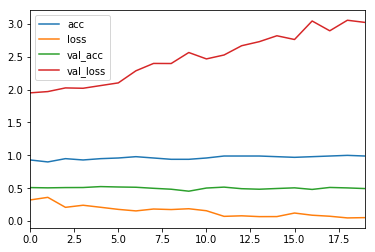

10/10 [==============================] - 2s - loss: 0.0531 - acc: 0.9900 - val_loss: 3.0221 - val_acc: 0.4950


In [43]:
model.fit_generator(image ,steps_per_epoch=len(X_tf_train), validation_data=(X_tf_test, Y_test),epochs=25,
                   callbacks=[TrainingVisualizerCallback()])

In [ ]:
# rotation gets validation accuracy up to 49.5% , compared to baseline of 46%


# Horizontal Flip

{'val_loss': [2.8655392163991928, 2.7844639313220978, 3.0167557907104494, 3.0544667762517927, 3.1801817893981932, 3.0781797993183138, 3.0800323009490969, 3.0690221744775772, 3.1145402371883391, 3.1514326339960097, 3.2376445734500887, 3.30046348631382, 3.2496390128135682, 3.2866289442777634, 3.3653052872419358, 3.3671793973445894, 3.3653581589460373, 3.4443596982955933, 3.7089496880769728, 3.5957949995994567, 3.6765262806415557, 3.6979528880119323, 3.6530084216594698, 3.7708007651567459, 3.7780473566055299], 'val_acc': [0.50400000743567941, 0.49900000594556332, 0.49800000824034213, 0.49300000615417955, 0.49700000621378421, 0.51100000537931922, 0.50300000555813318, 0.50500000782310961, 0.50500000752508645, 0.50800000689923763, 0.49700000725686549, 0.50500000663101674, 0.5130000054091215, 0.5100000065565109, 0.51300000555813308, 0.51500000499188903, 0.51000000528991218, 0.51600000582635408, 0.5170000064373016, 0.50800000354647634, 0.50600000701844694, 0.49700000621378421, 0.50500000528991

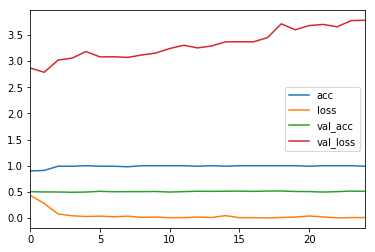

10/10 [==============================] - 2s - loss: 0.0102 - acc: 0.9900 - val_loss: 3.7780 - val_acc: 0.5110


In [48]:
model.fit_generator(image_2 ,steps_per_epoch=len(X_tf_train), validation_data=(X_tf_test, Y_test),epochs=25,
                   callbacks=[TrainingVisualizerCallback()])

In [ ]:
# Horizontal flip gets accuracy of 51.1% compared to baseline of 46%

# Vertical Flip

{'val_loss': [3.8458202958106993, 3.8059251123666762, 3.8613414806127548, 3.8222274434566499, 3.8158801269531248, 3.8185422122478485, 3.832293621301651, 3.7651313650608063, 3.8234990411996841, 3.9775207549333573, 4.0163310146331783, 4.0430462861061098, 4.0346171456575393, 4.0625495249032975, 4.1639437031745912, 4.1622372102737426, 4.155588262081146, 4.2263922369480129, 3.9546646428108216, 4.1065504550933838, 4.1166728174686433, 4.1687184154987333, 4.1058159482479093, 4.1450551927089689, 4.1990240728855133], 'val_acc': [0.5140000063180924, 0.51200000651180744, 0.5040000047534704, 0.5110000046342611, 0.51500000409781932, 0.5120000041276217, 0.51400000505149368, 0.5090000047534704, 0.51600000567734239, 0.50800000682473179, 0.50700000599026684, 0.512000005543232, 0.51100000724196437, 0.51400000482797625, 0.50300000697374347, 0.50700000748038287, 0.50800000615417962, 0.5200000056624412, 0.50800000645220278, 0.51000000528991218, 0.50500000484287744, 0.50800000540912149, 0.51100000485777852, 

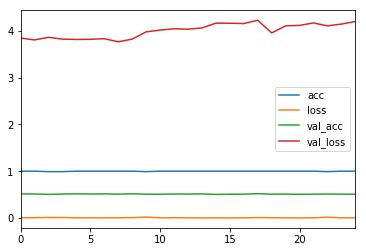

10/10 [==============================] - 2s - loss: 0.0017 - acc: 1.0000 - val_loss: 4.1990 - val_acc: 0.5070


In [51]:
model.fit_generator(image_3 ,steps_per_epoch=len(X_tf_train), validation_data=(X_tf_test, Y_test),epochs=25,
                   callbacks=[TrainingVisualizerCallback()])

In [ ]:
# vertical flip gets to 50.7% accuracy, baseline of 46%

# Shear

{'val_loss': [3.4716912031173708, 2.8310947650671006, 2.511077787876129, 2.4916478478908539, 2.4904030507802961, 2.4273483115434646, 2.4044551527500153, 2.370275402665138, 2.6203693312406542, 2.5789631968736648, 2.6638164913654325, 2.6073009443283079, 2.7447883063554763, 2.7336642426252364, 2.8829306721687318, 2.9008905637264251, 2.999223860502243, 3.0823921030759811, 3.2383950316905974, 3.2319651830196379, 3.1724117350578309, 3.3570049029588698, 3.3559335660934448, 3.3166821074485777, 3.3419889885187151], 'val_acc': [0.50300000622868535, 0.49800000637769698, 0.4990000070631504, 0.4970000071823597, 0.50700000733137129, 0.50500000551342961, 0.49200000479817391, 0.49600000649690629, 0.49100000739097593, 0.47600000664591791, 0.48900000646710395, 0.49100000739097593, 0.49100000485777856, 0.49100000575184821, 0.49700000479817391, 0.49800000578165055, 0.48800000652670861, 0.49400000542402267, 0.48700000673532484, 0.49300000682473183, 0.48600000604987142, 0.48500000678002836, 0.46700000710785

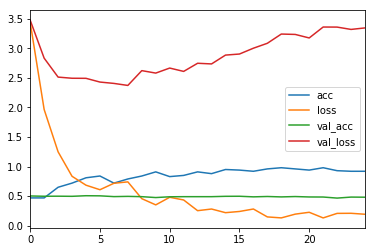

10/10 [==============================] - 2s - loss: 0.1939 - acc: 0.9200 - val_loss: 3.3420 - val_acc: 0.4820


In [57]:
model.fit_generator(image_4 ,steps_per_epoch=len(X_tf_train), validation_data=(X_tf_test, Y_test),epochs=25,
                   callbacks=[TrainingVisualizerCallback()])

In [ ]:
## Random shearing get accuracy of 48.2%

# Centered

{'val_loss': [4.1180478745698927, 4.0970923322439194, 4.0997641360759731, 4.0742183887958525, 4.0653340047597881, 4.0788385814428327, 4.0611974501609804, 4.0667063993215562, 4.07903270483017, 4.0867579555511471, 4.0726362979412079, 4.0666535454988484, 4.068143404722214, 4.064323421120644, 4.0546590292453768, 4.0526123011112212, 4.0579453128576279, 4.0651082074642177, 4.0744239503145216, 4.0727435159683232, 4.080531234741211, 4.0803181326389311, 4.0842612618207932, 4.0927180379629133, 4.0900923514366152], 'val_acc': [0.45100000672042367, 0.43800000540912154, 0.43300000563263891, 0.42400000542402266, 0.42400000631809237, 0.41800000593066217, 0.41800000563263895, 0.41600000604987142, 0.41300000533461573, 0.41700000673532484, 0.41900000631809237, 0.41200000517070295, 0.41300000570714474, 0.40900000564754008, 0.41300000600516795, 0.41200000636279582, 0.41100000582635404, 0.41100000582635404, 0.40900000624358657, 0.40800000660121438, 0.40700000636279582, 0.40800000630319117, 0.40700000636279

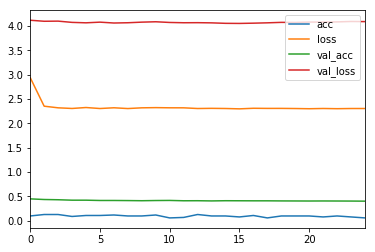

10/10 [==============================] - 3s - loss: 2.3060 - acc: 0.0600 - val_loss: 4.0901 - val_acc: 0.4040


In [71]:
model.fit_generator(image_5 ,steps_per_epoch=len(X_tf_train), validation_data=(X_tf_test, Y_test),epochs=25,
                   callbacks=[TrainingVisualizerCallback()])

In [ ]:
# Centered images only have slightly better accuracy 47.7% vs 46% for 

# Height Shift

{'val_loss': [2.2328198701143265, 1.873013095855713, 1.8797415721416473, 1.9152605330944061, 2.0328651213645936, 2.042587801218033, 2.1214642155170442, 2.1055953943729402, 2.1902052998542785, 2.225565038919449, 2.4018653869628905, 2.4958729243278501, 2.596305751800537, 2.4433813464641569, 2.6325471496582029, 2.9563345777988435, 3.0226898336410524, 3.323709146976471, 2.9876769495010378, 3.1047117316722872, 3.3619300854206084, 3.3615209877490999, 3.3394596350193022, 3.3340211141109468, 3.3030599200725557], 'val_acc': [0.404000007212162, 0.39600000627338888, 0.38600000724196432, 0.36500000707805158, 0.35500000625848771, 0.36100000597536563, 0.37000000566244123, 0.39300000600516793, 0.38600000642240045, 0.37500000491738317, 0.35400000572204587, 0.3610000053793192, 0.37300000660121441, 0.37100000627338886, 0.36200000613927841, 0.36500000603497029, 0.36000000543892385, 0.33300000660121443, 0.34000000573694705, 0.3530000065267086, 0.34500000648200513, 0.35700000718235969, 0.35000000797212122,

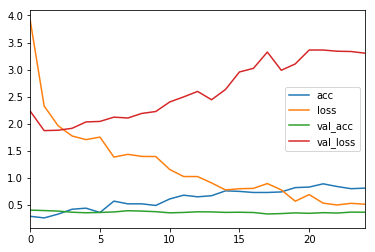

10/10 [==============================] - 2s - loss: 0.5127 - acc: 0.8100 - val_loss: 3.3031 - val_acc: 0.3650


In [74]:

model.fit_generator(image_6 ,steps_per_epoch=len(X_tf_train), validation_data=(X_tf_test, Y_test),epochs=25,
                   callbacks=[TrainingVisualizerCallback()])

## Task

- Use data augmentation to improve over the baseline performance of using just a single training example from each class

## Hints

- Use [`keras.preprocessing.image.ImageDataGenerator`](https://keras.io/preprocessing/image/) for performing data augmentation to increase the effective size of your training set

## Requirements

- Use the hyperparameters above and do **not** modify any of them
- Execute the code cell above which redefines and recompiles the model to reset the weights!

## Concessions

- You may use `X_tf_test` for validation `(`e.g. `model.fit(..., validation_data=(X_tf_test, Y_test))` for simplicity and report this number

# Question

- Did you find any augmentations which resulted in an increase in prediction accuracy? If so, which augmentation(s)? Be sure to include evidence data to back up your claim.

In [ ]:
## THe biggest increase came from horizontal flips in the images (51% vs 46% baseline)